In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("train_data.txt",sep=':::',names=['title', 'genre', 'description'],engine="python")
df_test = pd.read_csv("test_data.txt",sep=':::',names=['id', 'title', 'description'],engine="python")
df.head(5)

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
df.isnull().sum()

title          0
genre          1
description    1
dtype: int64

In [9]:
df.dtypes


title          object
genre          object
description    object
dtype: object

In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
categories= df['genre'].unique()
categories

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', None], dtype=object)

In [9]:
values= df['genre'].value_counts()
values

genre
drama           34
documentary     32
comedy          28
short           10
thriller         8
horror           7
sci-fi           5
adult            4
action           4
western          3
reality-tv       3
sport            2
crime            2
mystery          2
family           2
talk-show        2
adventure        2
fantasy          1
animation        1
music            1
history          1
Name: count, dtype: int64

In [2]:
# Ensure categories and values are of the same length



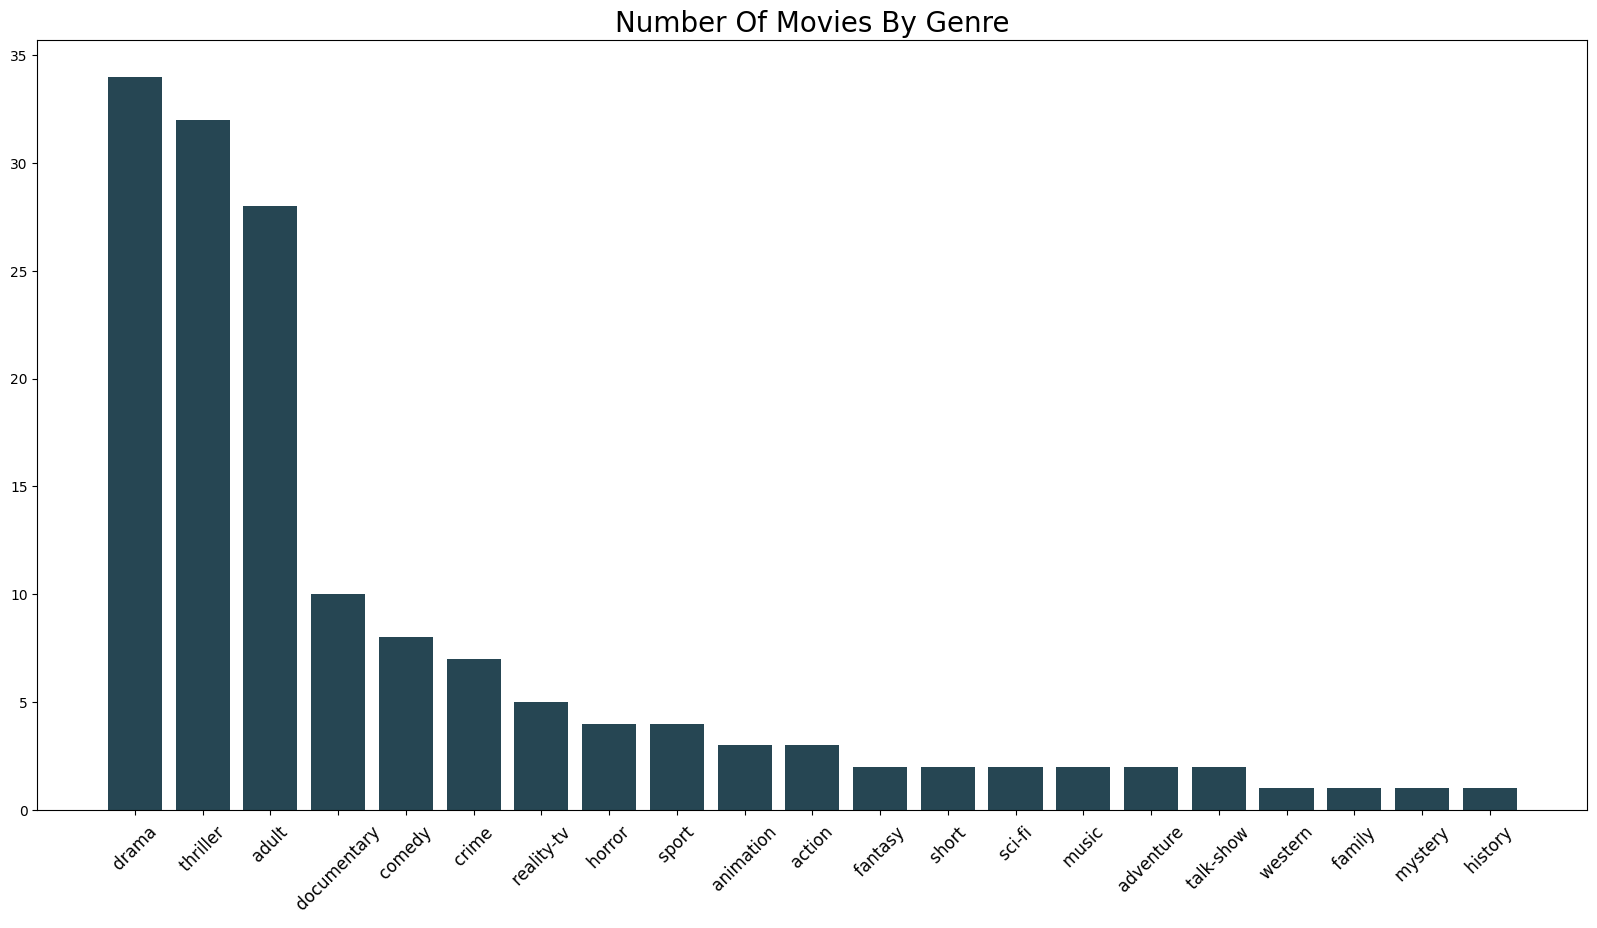

In [12]:
plt.figure(figsize=(20, 10))
colors = ['#264653']
plt.bar(categories, values, color=colors)
plt.tick_params(axis='x', labelsize=12, rotation=45)
plt.title('Number Of Movies By Genre', fontsize=20)
plt.show()


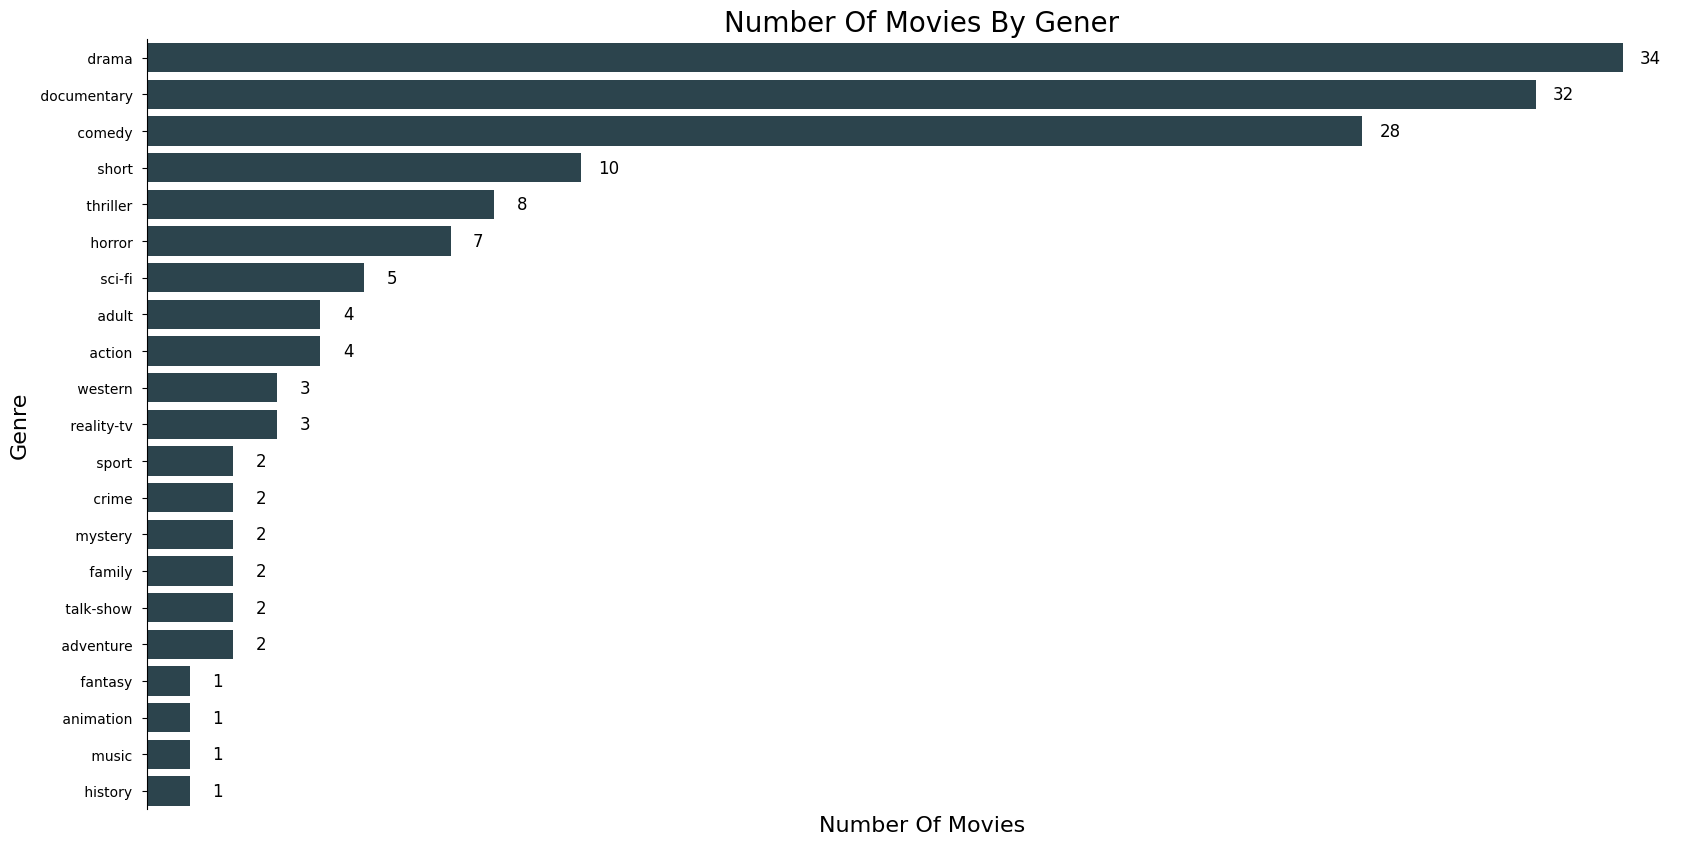

In [13]:
plt.figure(figsize=(20, 10))
colors = [ '#264653']
sns.countplot(data= df, y='genre', order= df['genre'].value_counts().index,color= colors[0])
plt.title('Number Of Movies By Gener',fontsize=20)
plt.ylabel('Genre',fontsize=16)
plt.xlabel('Number Of Movies',fontsize=16)
ax = plt.gca()
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(20, 0), textcoords='offset points')
plt.show()

In [14]:
df.columns

Index(['title', 'genre', 'description'], dtype='object')

In [15]:
import re 
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
def text_cleaner(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '',text)
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']",' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text 

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\smdsh\AppData\Local\Temp\ipykernel_13772\2463373792.py:16: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s[\s]+", " ", text).strip()
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smdsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smdsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
print(nltk.data.path)

['C:\\Users\\smdsh/nltk_data', 'c:\\Codsoft1\\.venv\\nltk_data', 'c:\\Codsoft1\\.venv\\share\\nltk_data', 'c:\\Codsoft1\\.venv\\lib\\nltk_data', 'C:\\Users\\smdsh\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smdsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smdsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import nltk

# Download the necessary resources
nltk.download('punkt')         # For tokenization
nltk.download('stopwords')     # For removing stopwords



[nltk_data] Downloading package punkt to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.data import find
try:
    find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

In [19]:
import re

def simple_tokenizer(text):
    if not isinstance(text, str):  # Check if the input is not a string
        return ""  # Return an empty string for non-string inputs
    return re.split(r'\W+', text)

# Apply the tokenizer function
df ['Description_cleand'] = df['description'].apply(simple_tokenizer)

In [20]:
df['description'] = df['description'].fillna('')

# Apply the tokenizer
df['Description_cleand'] = df['description'].apply(simple_tokenizer)

In [22]:
nltk.download('stopwords')
nltk.download('punkt')
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
def text_cleaner(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '',text)
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']",' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text 

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\smdsh\AppData\Local\Temp\ipykernel_8668\2463373792.py:16: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s[\s]+", " ", text).strip()
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
print(nltk.data.path)

['C:\\Users\\smdsh/nltk_data', 'c:\\Codsoft1\\.venv\\nltk_data', 'c:\\Codsoft1\\.venv\\share\\nltk_data', 'c:\\Codsoft1\\.venv\\lib\\nltk_data', 'C:\\Users\\smdsh\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [27]:
df['Description_len'] = df['description'].apply(len)
df['Description_cleand_len'] = df['Description_cleand'].apply(len)

In [28]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure required resources
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def text_cleaner(text):
    # Perform cleaning (e.g., lowercasing, punctuation removal)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])  # Join words back into a single string
    return text



[nltk_data] Downloading package punkt to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df

,title,genre,description,Description_cleand,Description_len,Description_cleand_len
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,"[, Listening, in, to, a, conversation, between...",546,97
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,"[, A, brother, and, sister, with, a, past, inc...",184,34
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,"[, As, the, bus, empties, the, students, for, ...",650,117
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,"[, To, help, their, unemployed, father, make, ...",1082,195
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,"[, The, film, s, title, refers, not, only, to,...",625,113
...,...,...,...,...,...,...
151,A Broadway Butterfly (1925),comedy,"Irene, a young girl from a small town, arrive...","[, Irene, a, young, girl, from, a, small, town...",345,72
152,How to Tie a Tie Video (2006),short,How to Tie a Tie Video teaches viewers how to...,"[, How, to, Tie, a, Tie, Video, teaches, viewe...",186,34
153,Fingerman: Dr. London and the Triangle Force ...,comedy,A suburban neighborhood is invaded by a team ...,"[, A, suburban, neighborhood, is, invaded, by,...",470,86
154,Wilder Reiter GmbH (1967),comedy,"Georg, the head of an advertising company, fi...","[, Georg, the, head, of, an, advertising, comp...",532,102


In [30]:
df_test

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
156,157,"""Uncle Old School"" (2012)",Playboy bachelor Elliott is forced to take in...
157,158,Ma-nyeo (2014),Saeyoung is a new employee who eventually sta...
158,159,Juntos estamos divididos (2007),"On January 11, 2007, in the Bolivian city of ..."
159,160,My First Movie (2013),"""El Sebas"" is a ""loser"". He is overweight and..."


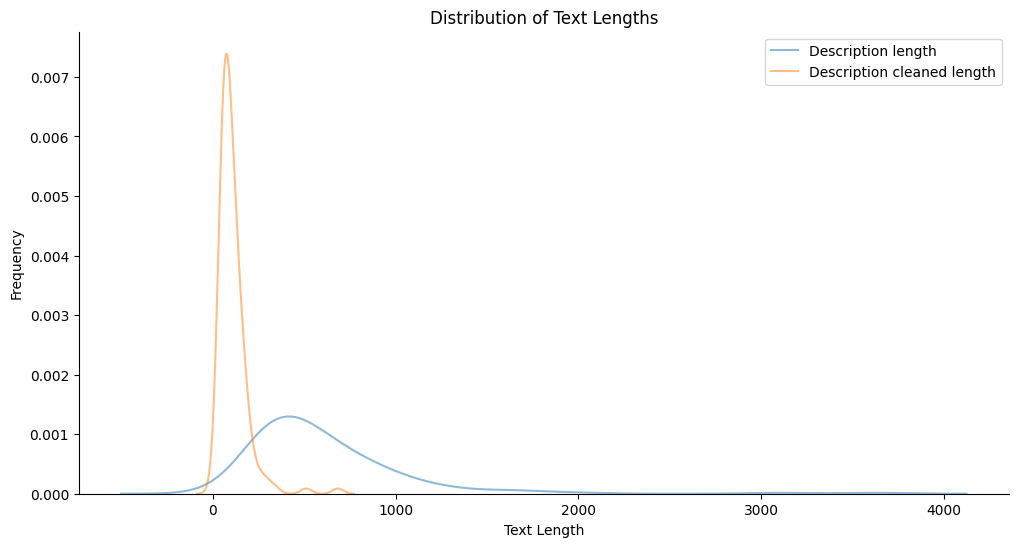

In [31]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Description_len'], label='Description length',alpha=0.5)
sns.kdeplot(df['Description_cleand_len'], label='Description cleaned length',alpha=0.5)
ax = plt.gca()
#ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(df['Description_cleand'])

# Transform the test data (use transform, not fit_transform)



In [40]:
print(df_test.columns)


Index(['id', 'title', 'description'], dtype='object')


In [44]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Codsoft1\.venv\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [47]:
df_test['Description_cleaned_test'] = df_test['description'].apply(text_cleaner)


In [48]:
X_test = tfidf_vectorizer.transform(df_test['Description_cleaned_test'])


In [50]:
print('shape_train : ', X_train.shape)
print('shape_test : ', X_test.shape)

shape_train :  (155, 4446)
shape_test :  (161, 4446)


In [53]:
# Remove rows where the target column contains None or NaN values
df = df.dropna(subset=['genre'])


In [55]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
le = LabelEncoder()



In [56]:
le = LabelEncoder()
# Fit the encoder on the combined data
y_combined = pd.concat([y_train, y_val])
le.fit(y_combined)

# Transform the labels in both sets
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)


In [57]:
y_train = y_train.str.strip()
y_val = y_val.str.strip()


In [59]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)



In [69]:
# Print the length of the dataset to confirm the number of rows
print(f"Original dataset length: {len(df)}")

# Check if there are any rows with missing values in the 'genre' column
print(f"Rows with missing 'genre': {df['genre'].isnull().sum()}")


Original dataset length: 154
Rows with missing 'genre': 0


In [71]:
# Print the column names of the DataFrame to identify the correct feature column
print(df.columns)


Index(['title', 'genre', 'description', 'Description_cleand',
       'Description_len', 'Description_cleand_len'],
      dtype='object')


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Ensure you're using the correct feature and target columns
X = df['description']  # Replace with actual text column name
y = df['genre']        # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')  # You can also use CountVectorizer if preferred
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.1935483870967742
               precision    recall  f1-score   support

   adventure        0.00      0.00      0.00         1
   animation        0.00      0.00      0.00         1
      comedy        0.00      0.00      0.00         3
 documentary        0.29      0.50      0.36         4
       drama        0.17      0.80      0.29         5
      family        0.00      0.00      0.00         2
      horror        0.00      0.00      0.00         4
     mystery        0.00      0.00      0.00         1
      sci-fi        0.00      0.00      0.00         2
       short        0.00      0.00      0.00         4
       sport        0.00      0.00      0.00         1
    thriller        0.00      0.00      0.00         2
     western        0.00      0.00      0.00         1

     accuracy                           0.19        31
    macro avg       0.04      0.10      0.05        31
 weighted avg       0.06      0.19      0.09        31



c:\Codsoft1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Codsoft1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Codsoft1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
df_test

,id,title,description,Description_cleaned_test
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",Brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",Spain March 1964 Quico naughty child three bel...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,One year life Albin family shepherds North Tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",His father died hasnt spoken brother years ser...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,Before known internationally martial arts supe...
...,...,...,...,...
156,157,"""Uncle Old School"" (2012)",Playboy bachelor Elliott is forced to take in...,Playboy bachelor Elliott forced take spoiled s...
157,158,Ma-nyeo (2014),Saeyoung is a new employee who eventually sta...,Saeyoung new employee eventually stands Leesun...
158,159,Juntos estamos divididos (2007),"On January 11, 2007, in the Bolivian city of ...",January 2007 Bolivian city Cochabamba thousand...
159,160,My First Movie (2013),"""El Sebas"" is a ""loser"". He is overweight and...",Sebas loser overweight doesnt job dreams becom...
